In [4]:
import tensorflow as tf
tf.__version__


'2.5.0'

In [6]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


In [10]:
# normalize training and testing data b/w  0 and 1 . this makes it easier for model to train

x_train=tf.keras.utils.normalize(x_train, axis=1)
x_test-tf.keras.utils.normalize(x_test, axis=1)


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [18]:
# Build the model

model= tf.keras.models.Sequential() # feed forward model

# add layers to the model
model.add(tf.keras.layers.Flatten())  #input layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  #dense fully connected 1st hidden layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) #2nd hidden layer
# 128 is the no. of connected neurons
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) #output layer with 10 neurons (0-9)
# softmax act fun is used because o/p layer returns probability

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train, y_train, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2710 - accuracy: 0.9214
Epoch 2/2
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1126 - accuracy: 0.9652


In [19]:
# find out validation accuracy by testing model on some out of sample training examples
val_loss, val_acc= model.evaluate(x_test,y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 1ms/step - loss: 61.1654 - accuracy: 0.9504
61.1653938293457 0.9503999948501587


In [20]:
model.save('mnist_model.model') #save the model

INFO:tensorflow:Assets written to: mnist_model.model/assets


In [24]:
# export the model and predict any result
new_model=tf.keras.models.load_model('mnist_model.model')
predictions=new_model.predict([x_test])
print(predictions) # returns an array of 1 hot encoded value (if predicted value=7, the 8th val 
# in matrix =1 ;rest all are 0)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [27]:
import numpy as np
print(np.argmax(predictions[0])) #returns the value with max probability
print(np.argmax(predictions[7]))

7
9


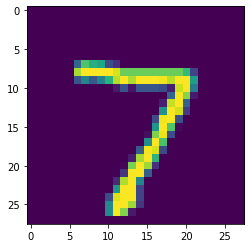

In [29]:
# proof that prediction is correct
import matplotlib.pyplot as plt
plt.imshow(x_test[0])

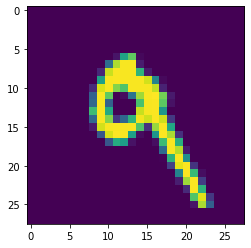

In [30]:
plt.imshow(x_test[7])